# Job Outcomes of College Students Between 2010 and 2012 in the U.S.

In this project, we'll be working with a dataset on the job outcomes of students who graduated from college between 2010 and 2012. The original data on job outcomes was released by [American Community Survey](https://www.census.gov/programs-surveys/acs/), which conducts surveys and aggregates the data. [FiveThirtyEight](https://fivethirtyeight.com/) cleaned the dataset and released it on their [Github repo](https://github.com/fivethirtyeight/data/tree/master/college-majors).

This project will be used to showcase how using the pandas plotting functionality along with the Jupyter notebook interface allows us to explore data quickly using visualizations.

Using visualizations, we will explore the following questions from the dataset:

- Do students in more popular majors make more money?
- How many majors are predominantly male? Predominantly female?
- Which category of majors have the most students?

### Summary of Results
After analyzing the data, we reached the conclusion that students in more popular majors did not earn more, or less money than students in less popular majors. We also learned that the top 10 highest earning majors are predominantly male, whereas the 10 lowest earning majors were predominantly female. However, if we look at all the majors in the dataset, there are more female-predominant majors than male-predominant majors. From looking deeper into this, the data allowed us to weakly infer that the more there are females enrolled in a certain major, the lower the median earning will be for that major. Finally, we found out that the major category with the most students is Business, followed by Humanities & Liberal Arts and Education.

For more details, please refer to the the full analysis below.

## Setting-Up the Environment

We will start by importing the libraries we need and running the necessary Jupyter magic so that plots are displayed inline.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# Running Jupyter magic so that plots are displayed inline
%matplotlib inline

## Reading the Dataset

In [2]:
# Reading the csv into pandas
recent_grads = pd.read_csv("recent-grads.csv")

## Exploring the Dataset

In [3]:
# Returning first row formatted as table
recent_grads.iloc[1]

Rank                                                 2
Major_code                                        2416
Major                   MINING AND MINERAL ENGINEERING
Total                                              756
Men                                                679
Women                                               77
Major_category                             Engineering
ShareWomen                                    0.101852
Sample_size                                          7
Employed                                           640
Full_time                                          556
Part_time                                          170
Full_time_year_round                               388
Unemployed                                          85
Unemployment_rate                             0.117241
Median                                           75000
P25th                                            55000
P75th                                            90000
College_jo

In [4]:
# Exploring top of the dataset
recent_grads.head()

,Rank,Major_code,Major,Total,Men,Women,Major_category,ShareWomen,Sample_size,Employed,...,Part_time,Full_time_year_round,Unemployed,Unemployment_rate,Median,P25th,P75th,College_jobs,Non_college_jobs,Low_wage_jobs
0,1,2419,PETROLEUM ENGINEERING,2339.0,2057.0,282.0,Engineering,0.120564,36,1976,...,270,1207,37,0.018381,110000,95000,125000,1534,364,193
1,2,2416,MINING AND MINERAL ENGINEERING,756.0,679.0,77.0,Engineering,0.101852,7,640,...,170,388,85,0.117241,75000,55000,90000,350,257,50
2,3,2415,METALLURGICAL ENGINEERING,856.0,725.0,131.0,Engineering,0.153037,3,648,...,133,340,16,0.024096,73000,50000,105000,456,176,0
3,4,2417,NAVAL ARCHITECTURE AND MARINE ENGINEERING,1258.0,1123.0,135.0,Engineering,0.107313,16,758,...,150,692,40,0.050125,70000,43000,80000,529,102,0
4,5,2405,CHEMICAL ENGINEERING,32260.0,21239.0,11021.0,Engineering,0.341631,289,25694,...,5180,16697,1672,0.061098,65000,50000,75000,18314,4440,972


In [5]:
# Exploring bottom of the dataset
recent_grads.tail()

,Rank,Major_code,Major,Total,Men,Women,Major_category,ShareWomen,Sample_size,Employed,...,Part_time,Full_time_year_round,Unemployed,Unemployment_rate,Median,P25th,P75th,College_jobs,Non_college_jobs,Low_wage_jobs
168,169,3609,ZOOLOGY,8409.0,3050.0,5359.0,Biology & Life Science,0.637293,47,6259,...,2190,3602,304,0.046320,26000,20000,39000,2771,2947,743
169,170,5201,EDUCATIONAL PSYCHOLOGY,2854.0,522.0,2332.0,Psychology & Social Work,0.817099,7,2125,...,572,1211,148,0.065112,25000,24000,34000,1488,615,82
170,171,5202,CLINICAL PSYCHOLOGY,2838.0,568.0,2270.0,Psychology & Social Work,0.799859,13,2101,...,648,1293,368,0.149048,25000,25000,40000,986,870,622
171,172,5203,COUNSELING PSYCHOLOGY,4626.0,931.0,3695.0,Psychology & Social Work,0.798746,21,3777,...,965,2738,214,0.053621,23400,19200,26000,2403,1245,308
172,173,3501,LIBRARY SCIENCE,1098.0,134.0,964.0,Education,0.877960,2,742,...,237,410,87,0.104946,22000,20000,22000,288,338,192


In [6]:
# Generating summary statistics for all numeric columns
recent_grads.describe()

,Rank,Major_code,Total,Men,Women,ShareWomen,Sample_size,Employed,Full_time,Part_time,Full_time_year_round,Unemployed,Unemployment_rate,Median,P25th,P75th,College_jobs,Non_college_jobs,Low_wage_jobs
count,173.000000,173.000000,172.000000,172.000000,172.000000,172.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000
mean,87.000000,3879.815029,39370.081395,16723.406977,22646.674419,0.522223,356.080925,31192.763006,26029.306358,8832.398844,19694.427746,2416.329480,0.068191,40151.445087,29501.445087,51494.219653,12322.635838,13284.497110,3859.017341
std,50.084928,1687.753140,63483.491009,28122.433474,41057.330740,0.231205,618.361022,50675.002241,42869.655092,14648.179473,33160.941514,4112.803148,0.030331,11470.181802,9166.005235,14906.279740,21299.868863,23789.655363,6944.998579
min,1.000000,1100.000000,124.000000,119.000000,0.000000,0.000000,2.000000,0.000000,111.000000,0.000000,111.000000,0.000000,0.000000,22000.000000,18500.000000,22000.000000,0.000000,0.000000,0.000000
25%,44.000000,2403.000000,4549.750000,2177.500000,1778.250000,0.336026,39.000000,3608.000000,3154.000000,1030.000000,2453.000000,304.000000,0.050306,33000.000000,24000.000000,42000.000000,1675.000000,1591.000000,340.000000
50%,87.000000,3608.000000,15104.000000,5434.000000,8386.500000,0.534024,130.000000,11797.000000,10048.000000,3299.000000,7413.000000,893.000000,0.067961,36000.000000,27000.000000,47000.000000,4390.000000,4595.000000,1231.000000
75%,130.000000,5503.000000,38909.750000,14631.000000,22553.750000,0.703299,338.000000,31433.000000,25147.000000,9948.000000,16891.000000,2393.000000,0.087557,45000.000000,33000.000000,60000.000000,14444.000000,11783.000000,3466.000000
max,173.000000,6403.000000,393735.000000,173809.000000,307087.000000,0.968954,4212.000000,307933.000000,251540.000000,115172.000000,199897.000000,28169.000000,0.177226,110000.000000,95000.000000,125000.000000,151643.000000,148395.000000,48207.000000


To help us in our exploration, here is a dictionary key for a couple of the columns in the dataset:

- `Rank` - Rank by median earnings
- `Major_code` - Major code, FO1DP in ACS PUMS
- `Major` - Major description
- `Major_category` - Category of major from Carnevale et al
- `Total` - Total number of people with major
- `Sample_size` - Sample size (unweighted) of full-time, year-round ONLY (used for earnings)
- `Men` - Male graduates
- `Women` - Female graduates
- `ShareWomen` - Women as share of total
- `Employed` - Number employed (ESR == 1 or 2)
- `Full_time` - Employed 35 hours or more
- `Part_time` - Employed less than 35 hours
- `Full_time_year_round` - Employed at least 50 weeks (WKW == 1) and at least 35 hours (WKHP >= 35)
- `Unemployed` - Number unemployed (ESR == 3)
- `Unemployment_rate` - Unemployed / (Unemployed + Employed)
- `Median` - Median earnings of full-time, year-round workers
- `P25th` - 25th percentile of earnigns
- `P75th` - 75th percentile of earnings
- `College_jobs` - Number with job requiring a college degree
- `Non_college_jobs` - Number with job not requiring a college degree
- `Low_wage_jobs` - Number in low-wage service jobs

Before we start using Matplotlib to visualize our data, we have to drop rows containing missing values. Because Matplotlib expects that columns of values we pass in have matching lengths, the missing values will cause Matplotlib to throw errors.

In [7]:
# Looking up number of rows
raw_data_count = recent_grads.shape[0]
print(raw_data_count)

173


In [8]:
# Dropping rows containing missing values
recent_grads = recent_grads.dropna()

# Looking up number of rows after drop
cleaned_data_count = recent_grads.shape[0]
print(cleaned_data_count)

172


We notice that there was only one row containing missing values.

## Visualizing the Data with Scatter Plots

We can now start to visualize some of the data by using Matplotlib functionalities. We will first generate scatter plots to explore relations between certain columns. Our goal here is to answer the following questions:

- Do students in more popular majors make more money than students in unpopular majors?
- Do students that majored in subjects that were majority female make more money?
- Do students in more popular majors have a lower or higher unemployment rate than students in unpopular majors?

First, we need to verify if the chosen sample size of full-time employees affects the calculated earnings (median income in this case).

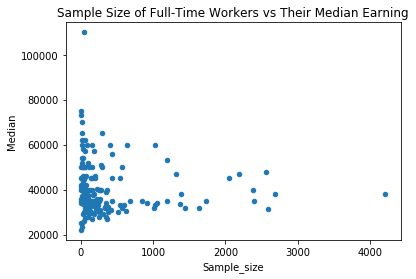

In [9]:
# Plotting a scatter plot for sample size and median
recent_grads.plot(x="Sample_size", y="Median", kind="scatter", title="Sample Size of Full-Time Workers vs Their Median Earning")

There seems to be no correlation between the sample-size chosen to calculate earnings and the median income calculated. This is reassuring as this means that the sample size that is chosen to calculate earnings does not affect the calculated earnings (median income).

#### Do students in more popular majors make more money than students in unpopular majors?

We can now check whether students in more popular majors make more money. To do this, we can compare the total amount of students enrolled in each major, and compare it with the median earning of that major.

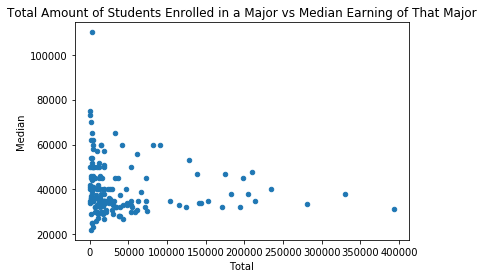

In [10]:
# Plotting scatter plot for median and total columns
recent_grads.plot(x="Total",y="Median", kind="scatter", title="Total Amount of Students Enrolled in a Major vs Median Earning of That Major")


There seems to be no correlation between the popularity of a major and the median earning of its graduates. 

#### Do students that majored in subjects that were majority female make more money?

Next, we can check whether students that majored in subjects that were majority female make more money than students that majored in subjects that were majority male. To do this, we can compare the `ShareWomen` and `Median` columns.

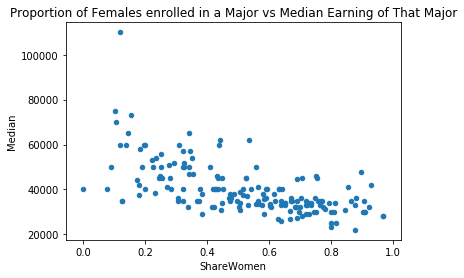

In [11]:
# Plotting scatter plot for proportion female and median earning
recent_grads.plot(x="ShareWomen",y="Median", kind="scatter", title="Proportion of Females enrolled in a Major vs Median Earning of That Major")

This is the first interesting observation to be made: there is a very weak negative correlation between proportion of females enrolled in a major and the median earning of students enrolled in that major. In lay terms, we can weakly infer that the more there are females enrolled in a certain major, the lower the median earning will be for that major.

#### Do students in more popular majors have a lower or higher unemployment rate than students in unpopular majors?

Although there are many other things we could visualize using scatter plots, the last one we will do in this case is verifying if there is a relationship between unemployment rates and popularity of majors.

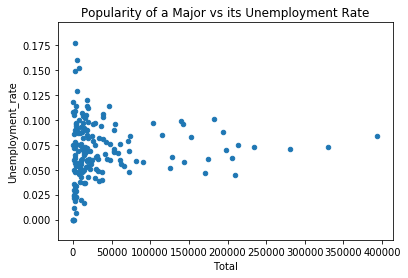

In [12]:
# Plotting scatter plot for major popularity and unemployment rate
recent_grads.plot(x="Total", y="Unemployment_rate", kind="scatter", title="Popularity of a Major vs its Unemployment Rate")

There seems to be no correlation between the popularity of a major and its unemployment rate post-graduation.

## Visualizing the Data with Histograms

We will now generate histograms in separate jupyter notebook cells to explore the distributions of the several columns. Our goal here is to answer the following questions:
- Are majors predominantly male or predominantly female?
- What's the most common median salary range?

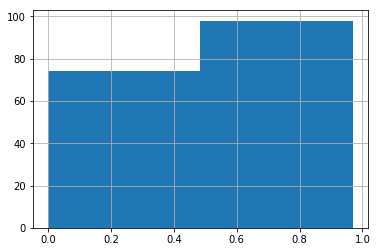

In [13]:
# Plotting histogram to verify distribution of female proportion in each major
recent_grads["ShareWomen"].hist(bins=2) # 2 bins allow to divide data right down the middle - 50%

When taking a look at this first histogram, we can conclude that there are more female-predominant majors than male-predominant majors.

Next, we can check what is the most common median salary range. 

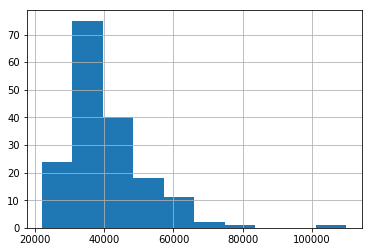

In [14]:
# Plotting histogram to verify distribution of median salary
recent_grads["Median"].hist()

We notice that the most common median salary range is between 30,000 and 40,000.

## Visualizing Data with Scatter Matrix Plots

Scatter matrix plots allows us to explore potential relationships and distributions simultaneously. For this reason, we will use them to help us further answer the questions that were previously asked:

- Do students in more popular majors make more money than students in unpopular majors?
- Do students in more popular majors have a lower or higher unemployment rate than students in unpopular majors?

First, we can check whether students in popular majors make more money than students in unpopular majors.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x115d11cc0>,
      dtype=object)

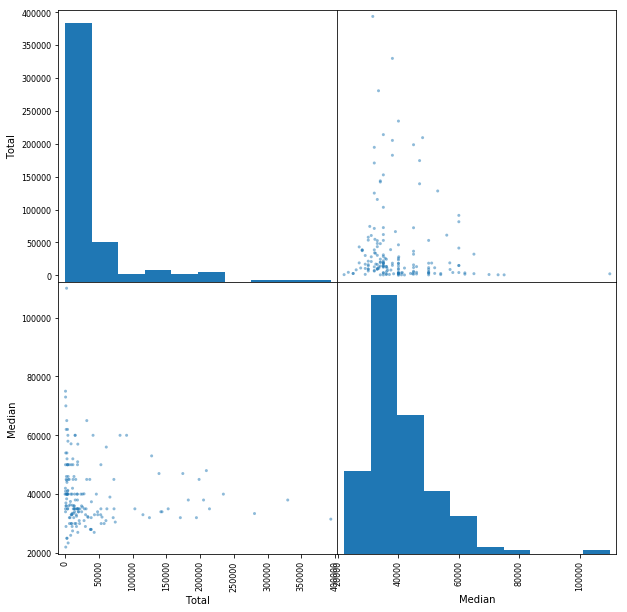

In [15]:
# Importing the scatter matrix function from pandas to allow easy access to scatter matrix plot
from pandas.plotting import scatter_matrix

scatter_matrix(recent_grads[["Total","Median"]], figsize=(10,10))

Again, there appears to be no difference between the median earnings of popular and unpopular majors.

Next, we can check whether students in popular majors have a lower or higher unemployment rate than students in unpopular majors.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x115f08828>,
      dtype=object)

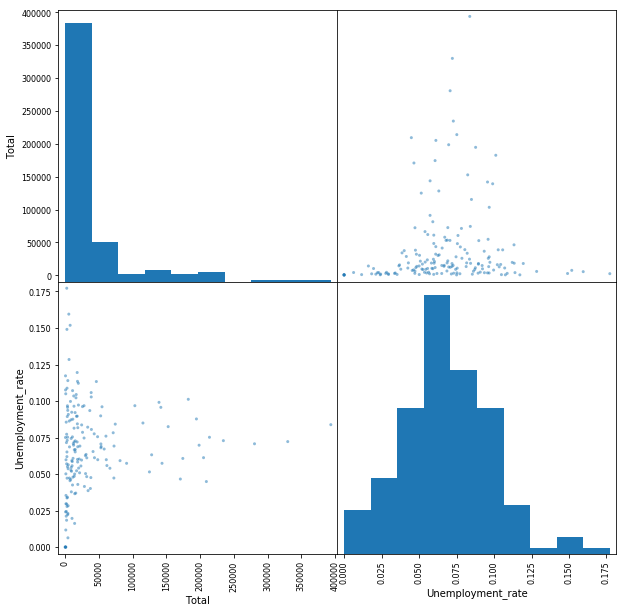

In [16]:
# Plotting scatter matrix for total and unemployment rate
scatter_matrix(recent_grads[["Total", "Unemployment_rate"]], figsize=(10,10))

Again, the unemployment rate in popular and unpopular majors appears to be very similar. There is no clear difference.

## Visualizing Data with Bar Plots

Bar plots allow us to visualize our data in a different way. We will now use bar plots to compare the percentages of women (`ShareWomen`) from the first ten rows and last ten rows of the `recent_grads` dataframe. We will then use bar plots to compare the unemployment rate (`Unemployment_rate`) from the first ten rows and last ten rows of that same dataframe.

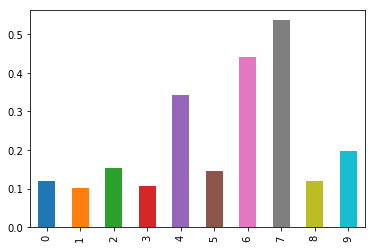

In [17]:
# Bar plot for first 10 rows of dataframe
recent_grads[:10]['ShareWomen'].plot(kind='bar')

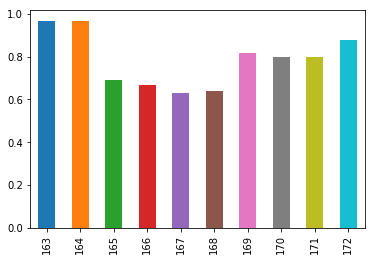

In [18]:
# Bar plot for last 10 rows of dataframe
recent_grads[-10:]['ShareWomen'].plot(kind='bar')

From these two bar plots, we observe that the highest earning majors are predominantly males, whereas the lowest earning majors are all female-predominant majors.

We can create the representation to view unemployment rates:

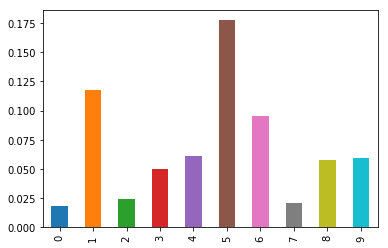

In [19]:
# Bar plot for first 10 rows of dataframe
recent_grads[:10]['Unemployment_rate'].plot(kind='bar')

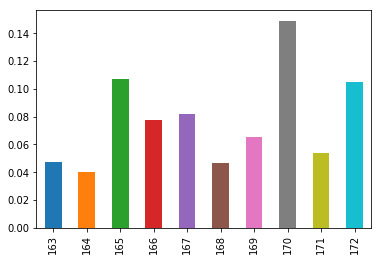

In [20]:
# Bar plot for last 10 rows of dataframe
recent_grads[-10:]['Unemployment_rate'].plot(kind='bar')

It is difficult to visually interpret these two bar plots, but when looking at unemployment rates under 5%, there are more of the lowest ranked earning majors in that category than the highest ranked earning majors.

## Aggregating Data by Major Category

To finish the analysis, we need to calculate which category of majors has the most students. We can use the pandas groupby and aggregation functions in order to do this.

In [21]:
# Grouping by major category and calculating various statistics from the Total column
recent_grads.groupby("Major_category").Total.agg(['count','min','max','sum'])

,count,min,max,sum
Major_category,,,,
Agriculture & Natural Resources,9,685.0,21573.0,75620.0
Arts,8,3340.0,103480.0,357130.0
Biology & Life Science,14,1329.0,280709.0,453862.0
Business,13,3777.0,329927.0,1302376.0
Communications & Journalism,4,52824.0,213996.0,392601.0
Computers & Mathematics,11,609.0,128319.0,299008.0
Education,16,804.0,170862.0,559129.0
Engineering,29,720.0,91227.0,537583.0
Health,12,11123.0,209394.0,463230.0


We could create a bar plot to help us visualize which major category has the most students.

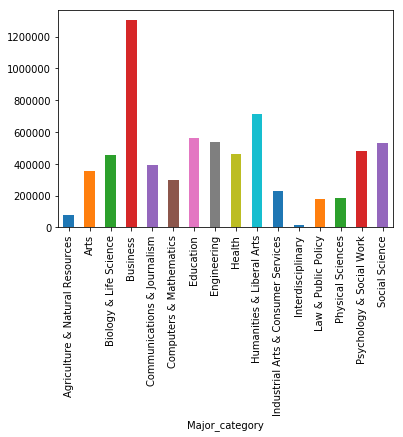

In [22]:
recent_grads.groupby("Major_category").Total.sum().plot(kind="bar")

The Business category is the major category with the most students, followed by Humanities & Liberal Arts and Education.

## Conclusion

The goal of this project was to determine several things:

- Do students in more popular majors make more money?
- How many majors are predominantly male? Predominantly female?
- Which category of majors have the most students?

When visualizing the data with different types of plots, we were able to come up with several answers to these questions. We found that students in more popular majors did not earn more, or less money than students in less popular majors. We also learned that the top 10 highest earning majors are predominantly male, whereas the 10 lowest earning majors were predominantly female. However, if we look at all the majors in the dataset, there are more female-predominant majors than male-predominant majors. From looking deeper into this, the data allowed us to weakly infer that the more there are females enrolled in a certain major, the lower the median earning will be for that major. Finally, we found out that the major category with the most students is Business, followed by Humanities & Liberal Arts and Education.